In [1]:
#IMPORT MODULES
from msops.TimeSeries import ReadRecord as rr
from msops.Utility.Utilities import CreateOutputsFolder,CreateCsvFiles
import os
from msops.Codes.Tbdy import TargetSpectrum as ts
import matplotlib.pyplot as plt

target = ts()
ElasticSpektrum = target.HorizontalElasticSpectrum(Ss = 1.091, S1 = 0.284, soil = "ZB")
DesignSpektrum = target.ReducedTargetSpectrum(TargetSpectrum=ElasticSpektrum,R=8,I=1,D=3,SD1 =0.2272 ,SDs = 0.9819)

EarthquakeName = "Mammoth_Lakes"
eventname = f"C:\\Users\\muham\\Masaüstü\\github\\msops\\msops\\Test\\Earthquakes\\{EarthquakeName}"
T = 0.84
# verilen deprem kayıtlarının bulunduğu klasördeki .AT2 uzantılı dosyaların listelenmesi
eventlist = [i for i in os.listdir(f"{eventname}") if i.endswith('.AT2')]
filePath = [f"{eventname}/{path}" for path in eventlist]

for index,eqe in enumerate(filePath):
    trash_Eq= rr.ReadRecord(eqe,gap=None, g=1, plot=0)
    timegap = rr.calc_timegap(Td=trash_Eq.Time[trash_Eq.last_valid_index()],damp_ratio= 0.05,T= T)
    Eq = rr.ReadRecord(eqe, timegap, g=1, plot=0)
    if index == 0:
        Events = Eq.copy()
    else:
        Events[f"Time{index}"] = Eq["Time"]
        Events[f"Acceleration{index}"] = Eq["Acceleration"]
nanindex =Events.Time1.isna().sum()
startNanIndex = Events.last_valid_index()-nanindex
Events.Time1[startNanIndex:Events.last_valid_index()].fillna(value=Events.Time[startNanIndex:Events.last_valid_index()+1],inplace=True)
Events.drop([Events.last_valid_index()],axis = 0,inplace=True)
Events.fillna(value=0.0,inplace=True)
periods,Sa,Sv,Sd = target.TimeSeriesSpectra(Acceleration= Events["Acceleration"] ,Time =Events["Time"])


In [2]:
Sa_series = target.LocationSeriesSpectra(T=T,Accelertions=Sa,Periods=periods)
pointSae,pointSar =target.LocationHorizontalSpectra(R=8.0,I=1.0,D=3.0,T=0.84,SD1 =0.2272 ,SDs = 0.9819)

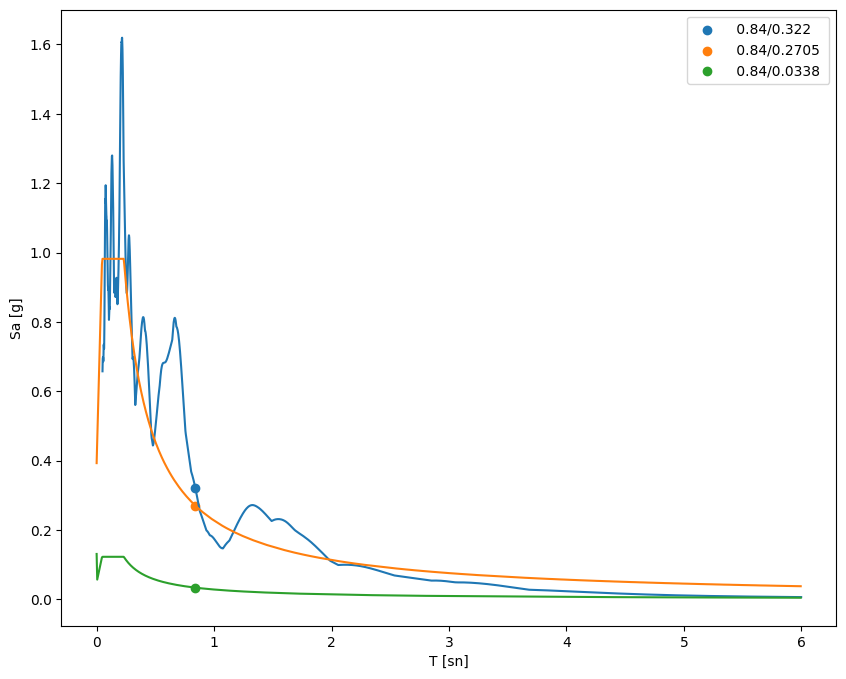

In [6]:
%matplotlib inline
fig , ax = plt.subplots( 1,1 , sharex = True , sharey = True  , figsize=(10,8) )
ax.plot(periods,Sa)
ax.scatter(T,Sa_series,label=f" {T}/{Sa_series} ")
ax.plot(ElasticSpektrum["T"],ElasticSpektrum["Sa"])
ax.plot(DesignSpektrum["T"],DesignSpektrum["SaR"])
ax.scatter(T,pointSae,label=f" {T}/{pointSae} ")
ax.scatter(T,pointSar,label=f" {T}/{pointSar} ")
ax.set_xlabel("T [sn]");ax.set_ylabel("Sa [g]")
ax.legend()

In [5]:
Events.Acceleration.max()

0.3413487

In [11]:
os.getcwd()+"\\"+f"aa"

'c:\\Users\\muham\\Masaüstü\\github\\msops\\msops\\Test\\aa'